In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Comenzamos a ver el dataset

### Objetivo: Predecir la autonomía (KMS) dependiendo del clima a partir de unos parametros dados

In [41]:
data = pd.read_csv('evdataset.csv')

In [42]:
data.shape

(194, 27)

In [43]:
data.head(3)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4


In [44]:
# Vemos la cantidad de valores nulos
data.isnull().sum().sum()

0

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [46]:
data['Make'].unique()

array(['Genesis', 'Mercedes', 'Porsche', 'BMW', 'Volkswagen', 'CUPRA',
       'Skoda', 'MG', 'Volvo', 'Fiat', 'Smart', 'Hyundai', 'Peugeot',
       'Citroen', 'Audi', 'Polestar', 'Toyota', 'Kia', 'DS', 'Ford',
       'Honda', 'JAC', 'Nissan', 'Renault', 'Opel', 'Hongqi', 'Lexus',
       'Dacia', 'Mazda', 'Seres', 'Tesla', 'Jaguar', 'Mini', 'Subaru'],
      dtype=object)

In [47]:
data['Make'].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Tesla          4
Genesis        4
Volvo          4
CUPRA          4
Polestar       2
Honda          2
Smart          2
Hongqi         2
DS             1
JAC            1
Nissan         1
Lexus          1
Dacia          1
Mazda          1
Seres          1
Jaguar         1
Mini           1
Subaru         1
Name: Make, dtype: int64

In [48]:
data.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

In [1]:
corr = data.corr(method = 'pearson').sort_values(by = 'Top Speed', axis = 0, ascending = False).sort_values(by = 'Top Speed', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40,10))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 1112, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:50,0:50], mask=mask[0:50,0:50], cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .8}, annot = True)

NameError: name 'data' is not defined

## Como tenemos una correlación tan fuerte entre 'Electric Range' y los tipos de conducción según el clima, podemos proseguir

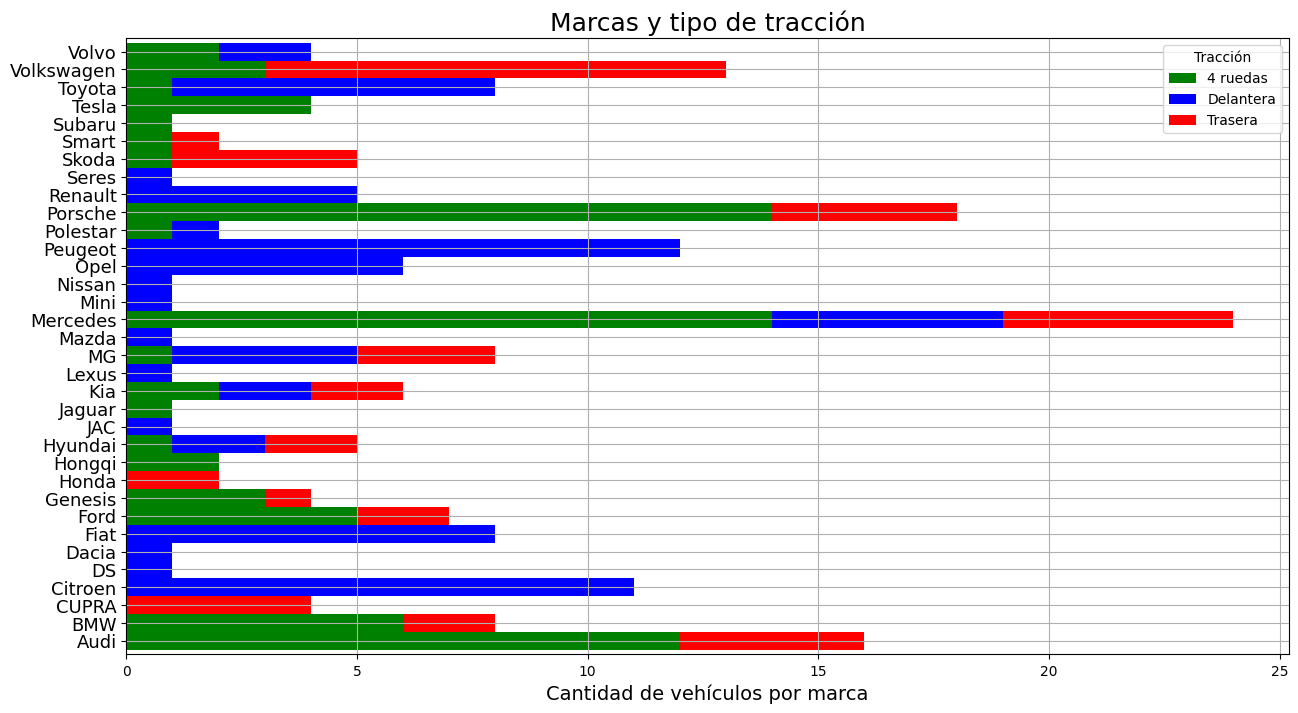

In [50]:
marca = data.groupby(['Make','Drive']).Drive.count()
marca = marca.unstack()
marca = marca.sort_values(by=['Make'])



marca.plot(kind='barh',stacked=True, color = ["g","b","r"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Marcas y tipo de tracción', fontsize=18)
plt.legend(title='Tracción',labels=['4 ruedas', 'Delantera', 'Trasera'])
plt.xlabel('Cantidad de vehículos por marca', fontsize=14)
plt.ylabel("")
plt.rc('ytick', labelsize=13)
plt.show()

In [51]:
data1 = data['Drive'].value_counts()
data1
#graficamos
fig = go.Figure(data =[go.Pie (labels=data1.index.values, values= data1,textinfo='label+percent')])
fig.show()

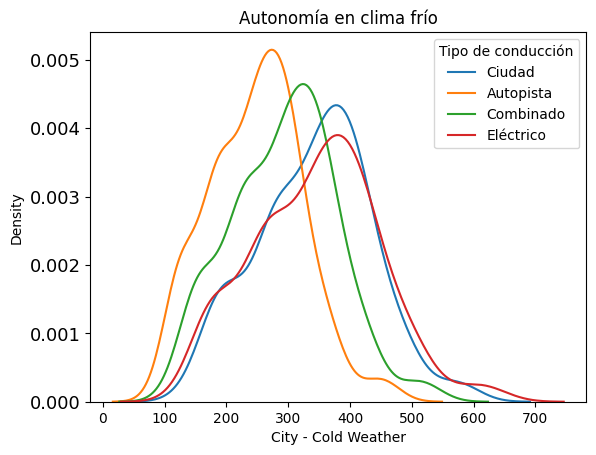

In [52]:
sns.kdeplot(data['City - Cold Weather'])
sns.kdeplot(data['Highway - Cold Weather'])
sns.kdeplot(data['Combined - Cold Weather'])
sns.kdeplot(data['Electric Range'])
plt.title('Autonomía en clima frío')
plt.legend(title='Tipo de conducción',labels=['Ciudad', 'Autopista', 'Combinado', 'Eléctrico'])
plt.show()


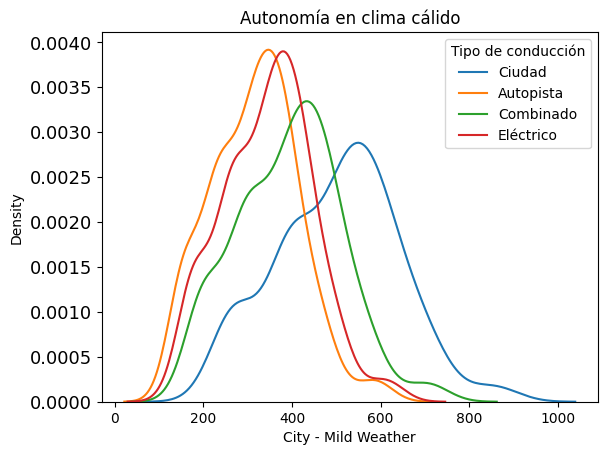

In [53]:
sns.kdeplot(data['City - Mild Weather'])
sns.kdeplot(data['Highway - Mild Weather'])
sns.kdeplot(data['Combined - Mild Weather'])
sns.kdeplot(data['Electric Range'])
plt.title('Autonomía en clima cálido')
plt.legend(title='Tipo de conducción', labels=['Ciudad', 'Autopista', 'Combinado', 'Eléctrico'])
plt.show()


In [54]:
data.head(2)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7


# Sustituimos las columnas de clima y tipo de conducción por la media de los tipos de conducción agrupados en clima

In [55]:
data['Range Cold Weather'] = (data['City - Cold Weather']+data['Highway - Cold Weather']+data['Combined - Cold Weather'])/3

In [56]:
data['Range Hot Weather'] = (data['City - Mild Weather']+data['Highway - Mild Weather']+data['Combined - Mild Weather'])/3

In [57]:
data.head(1)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,Range Cold Weather,Range Hot Weather
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,4515,1890,1580,2900,2495,595,432,5,331.666667,458.333333


In [58]:
# Eliminamos las columnas que nos sobran 
df = data.drop(['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','link'],axis=1)

In [59]:
# Redondeamos las columnas objetivo
df = df.round({'Range Cold Weather':2,'Range Hot Weather':2})

In [60]:
df['Drive'] = df['Drive'].replace({'Front':1, 'Rear':2, 'AWD':3})
df['Drive'] = df['Drive'].astype(float)

In [61]:
# Vemos un ejemplo de los coches
persona = df.sample().transpose()
persona

,162
id,1724
Make,Fiat
Acceleration 0 - 100 km/h,13.3
Top Speed,130
Electric Range,260
Total Power,100
Total Torque,260
Drive,1.0
Battery Capacity,75.0
Charge Power,7.4


# Utilizamos One Hot Encoder para cambiar a tipo float las marcas de los coches

In [62]:
from sklearn.preprocessing import OneHotEncoder #Librería
obj_vars = df.select_dtypes(include = 'object').columns #Columnas categóricas
encoder = OneHotEncoder() #Encoder
for var in obj_vars: #Entrenamos el encoder en cada variable
  encoder.fit(df.loc[:,[var]])
  enc_data = pd.DataFrame(encoder.transform(df.loc[:,[var]]).toarray(), columns = [var + '_' + typevar for typevar in encoder.categories_[0].tolist()], index = df.index)
  df = pd.concat([df, enc_data], axis = 1)
  df = df.drop([var], axis = 1)

In [63]:
df.columns

Index(['id', 'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats', 'Range Cold Weather', 'Range Hot Weather',
       'Make_Audi', 'Make_BMW', 'Make_CUPRA', 'Make_Citroen', 'Make_DS',
       'Make_Dacia', 'Make_Fiat', 'Make_Ford', 'Make_Genesis', 'Make_Honda',
       'Make_Hongqi', 'Make_Hyundai', 'Make_JAC', 'Make_Jaguar', 'Make_Kia',
       'Make_Lexus', 'Make_MG', 'Make_Mazda', 'Make_Mercedes', 'Make_Mini',
       'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Polestar',
       'Make_Porsche', 'Make_Renault', 'Make_Seres', 'Make_Skoda',
       'Make_Smart', 'Make_Subaru', 'Make_Tesla', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo'],
      dtype='object')

# Machine Learning

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df = df.reset_index()

In [66]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=113)

X_train = df_train.drop(columns=['Range Cold Weather','Range Hot Weather'])
y_train = df_train['Range Cold Weather']
X_test = df_test.drop(columns=['Range Cold Weather','Range Hot Weather'])
y_test = df_test['Range Cold Weather']

In [67]:
#X = df.reset_index().drop(columns=['Range Cold Weather','Range Hot Weather'])
#y = df.reset_index()['Range Cold Weather']

In [68]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=113)

# Modelización

In [69]:
#Partición de los datos
from sklearn.model_selection import KFold

#Escalado de datos
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [70]:
#Escalado de datos
scaler = StandardScaler()
scaler.fit(df)
X_train = scaler.transform(df.iloc[X_train.index,:])
X_test = scaler.transform(df.iloc[X_test.index,:])

In [71]:
y_test

176    151.67
181    306.67
156    230.00
68     508.33
117    343.33
        ...  
91     345.00
137    156.67
77     286.67
93     416.67
160    240.00
Name: Range Cold Weather, Length: 65, dtype: float64

In [72]:
# Predecir la autonomía según el X_test
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
clf.predict(X_test)



c:\Users\Nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.675e+02, tolerance: 8.838e+01



array([153.2009316 , 305.30602495, 229.02852554, 508.72966275,
       344.35719625, 327.94339223, 217.12996862, 350.45955786,
       421.03578697, 210.66909241, 360.93534957, 229.21042237,
       232.91195253, 343.89542471, 309.71665957, 278.1620714 ,
       174.27349608, 285.60650131, 292.46178255, 476.66222214,
       158.47410459, 251.51419208, 175.36258812, 230.03506941,
       146.09336077, 339.58977209, 322.3070972 , 320.38911494,
       327.45840278, 313.02310597, 309.9892631 , 201.80267725,
       305.99873628, 228.95225732, 198.15094737, 265.32700767,
       266.96614913, 424.54364401, 290.37340542, 142.92674195,
       367.2260321 , 297.14415236, 217.12847766, 249.2131188 ,
       115.6480714 , 327.97022946, 345.19699032, 154.57904076,
       324.57058601, 432.12179524, 372.92722781, 158.47783199,
       314.36284301, 362.54146084, 300.27691894, 393.09010079,
       378.94021821, 287.69511332, 296.36993238, 296.37067786,
       345.38579248, 155.84056778, 285.94027854, 416.09

In [73]:
X_test[1]

array([ 1.50886843,  1.46702678, -0.30713747,  0.07851591,  0.09302771,
       -0.09399417, -0.07981451, -0.01180398,  0.0817469 ,  0.30885089,
        0.16710472, -0.62103699,  0.02892662,  0.01368714,  0.02169031,
        0.35372798, -0.18850531, -0.16676977, -0.96496162, -0.35111099,
        0.14368144,  0.10753448, -0.29981268, -0.20739034, -0.14509525,
       -0.24517196, -0.07198158, -0.07198158, -0.20739034,  5.16858643,
       -0.14509525, -0.10206207, -0.10206207, -0.16265001, -0.07198158,
       -0.07198158, -0.1786474 , -0.07198158, -0.20739034, -0.07198158,
       -0.37573457, -0.07198158, -0.07198158, -0.1786474 , -0.2567763 ,
       -0.10206207, -0.31980107, -0.16265001, -0.07198158, -0.16265001,
       -0.10206207, -0.07198158, -0.14509525, -0.20739034, -0.26799852,
       -0.14509525])

### He conseguido ver la estimación de la autonomía clf.predict(X_test) con el modelo de regresión lineal, todavía tengo que calcular el error cuadrático (parece bastante bueno) y comprobar el error en otros modelos de predicción para decidir con cual me quedo.
### También tengo que saber cómo desescalar los datos para que la gente pueda meter los datos que quiera y así yo poder predecir la autonomía.
## Mirar como se ha hecho en EDA regression


In [ ]:

#Partición de datos de entrenamiento para analizar modelos
n_splits = 8
kf = KFold(n_splits = n_splits)

#Diccionario de modelos
models={'OLS': LinearRegression(),
        'SVR': SVR(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'RandomForest': RandomForestRegressor(),
        'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
       }


#Bucle
for name, model in models.items():
  print('Probamos modelo {}:'.format(name))
  rsme = []
  for train_idx, test_idx in kf.split(X, y):
    model.fit(X[train_idx,:], y[train_idx])
    y_pred = np.expm1(model.predict(X[test_idx,:]))
    rsme.append(np.sqrt(sum((np.expm1(y[test_idx])-y_pred)**2)))
  print('El RMSE medio de las estimaciones es: {:.2f}'.format(np.mean(rsme)))

Probamos modelo OLS:
El RMSE medio de las estimaciones es: inf
Probamos modelo SVR:
El RMSE medio de las estimaciones es: inf
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: inf
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: inf
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: inf
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: inf
Probamos modelo XGB:
El RMSE medio de las estimaciones es: inf
